#Breast Cancer Prediction Dataset

Breast cancer is a type of cancer that originates in the cells of the breast, primarily in the milk-producing ducts or the glands that produce milk, known as lobules. It is one of the most common cancers among women globally, though it can also affect men, albeit less frequently.

Signs and Symptoms:
1. Lump or Thickening: A noticeable lump or thickening in the breast or underarm.
2. Change in Size or Shape: Changes in the size, shape, or appearance of the breast.
3. Unexplained Pain: Persistent pain in the breast or nipple.

Breast cancer is when breast cells mutate and become cancerous cells that multiply and form tumors. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. Breast cancer typically affects women and people assigned female at birth (AFAB) age 50 and older, but it can also affect men and people assigned male at birth (AMAB), as well as younger women. Healthcare providers may treat breast cancer with surgery to remove tumors or treatment to kill cancerous cells.

Breast cancer awareness and research have led to improved treatments and outcomes, emphasizing the importance of early detection and multidisciplinary approaches to care. Ongoing efforts in research and education continue to shape the landscape of breast cancer prevention and treatment.

This dataset is taken from the UCI Machine Learning Repository (Link: https://data.world/health/breast-cancer-wisconsin) by the Donor: Nick Street

#Relevant Information

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.
A few of the images can be found at
http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].


This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/


# Original Creators

Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu


# Medical Literature

W.H. Wolberg, W.N. Street, and O.L. Mangasarian.
Machine learning techniques to diagnose breast cancer from
fine-needle aspirates.  
Cancer Letters 77 (1994) 163-171.

W.H. Wolberg, W.N. Street, and O.L. Mangasarian.
Image analysis and machine learning applied to breast cancer
diagnosis and prognosis.  
Analytical and Quantitative Cytology and Histology, Vol. 17
No. 2, pages 77-87, April 1995.

W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian.
Computerized breast cancer diagnosis and prognosis from fine
needle aspirates.  
Archives of Surgery 1995;130:511-516.

W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian.
Computer-derived nuclear features distinguish malignant from
benign breast cytology.  
Human Pathology, 26:792--796, 1995.


#**Models to be Applied**
1. Logistic Regression
2. Random Forest
3. Accuracy_score Classification Report
4. PCA

#Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#**Loading Dataset**

In [19]:
df = pd.read_csv("/content/breast-cancer-wisconsin-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**In the column of "Diagnosis", M stands for Malignant and B stands for Benign. Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)



In [20]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

#**Basic Information**

In [21]:
df.shape

(569, 32)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. **Number of Entries:** The dataset consists of 569 entries, ranging from index 0 to 568.

2. **Columns:** There are 32 columns in the dataset corresponding to various attributes of the patients and results of tests.

3. **Data Types:** Most of the columns (31 out of 32) are of the int64 data type.Only the oldpeak column is of the float64 data type.

In [23]:
#checking null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**There is no missing values in this data**

In [24]:
# statistical measures about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [28]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<ipython-input-29-bcfdb414b672>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'diagnosis',data= df,palette = {'B':'green','M':'r'})


<Axes: xlabel='diagnosis', ylabel='count'>

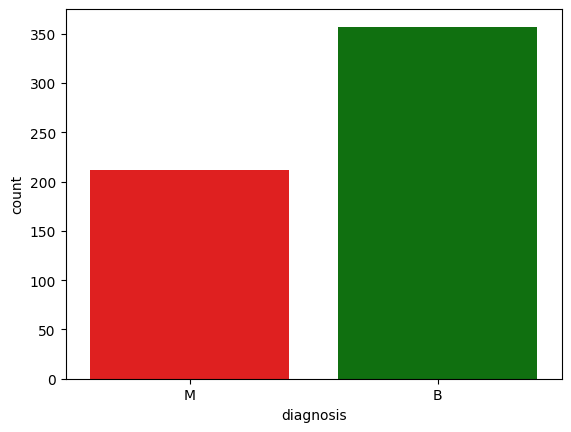

In [29]:
sns.countplot(x = 'diagnosis',data= df,palette = {'B':'green','M':'r'})

In the above graph the count of  Malignant Diagnosis is less than Benign diagnosis. As we can see Malignant diagnosis is 200 as Benign Diagnosis is 350.

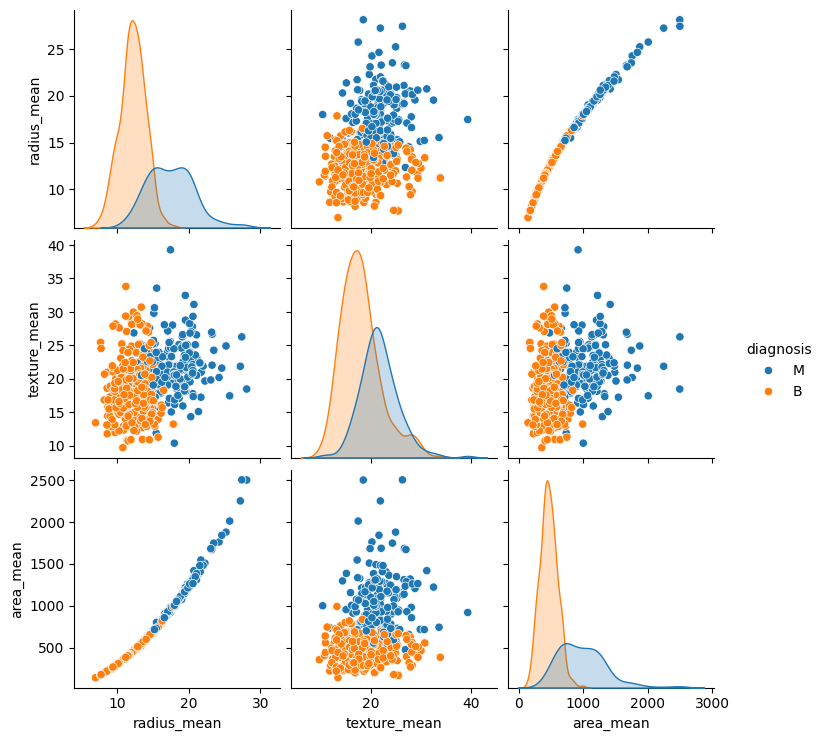

In [30]:
# Pairplot for visualizing relationships between different features
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean'])
plt.show()

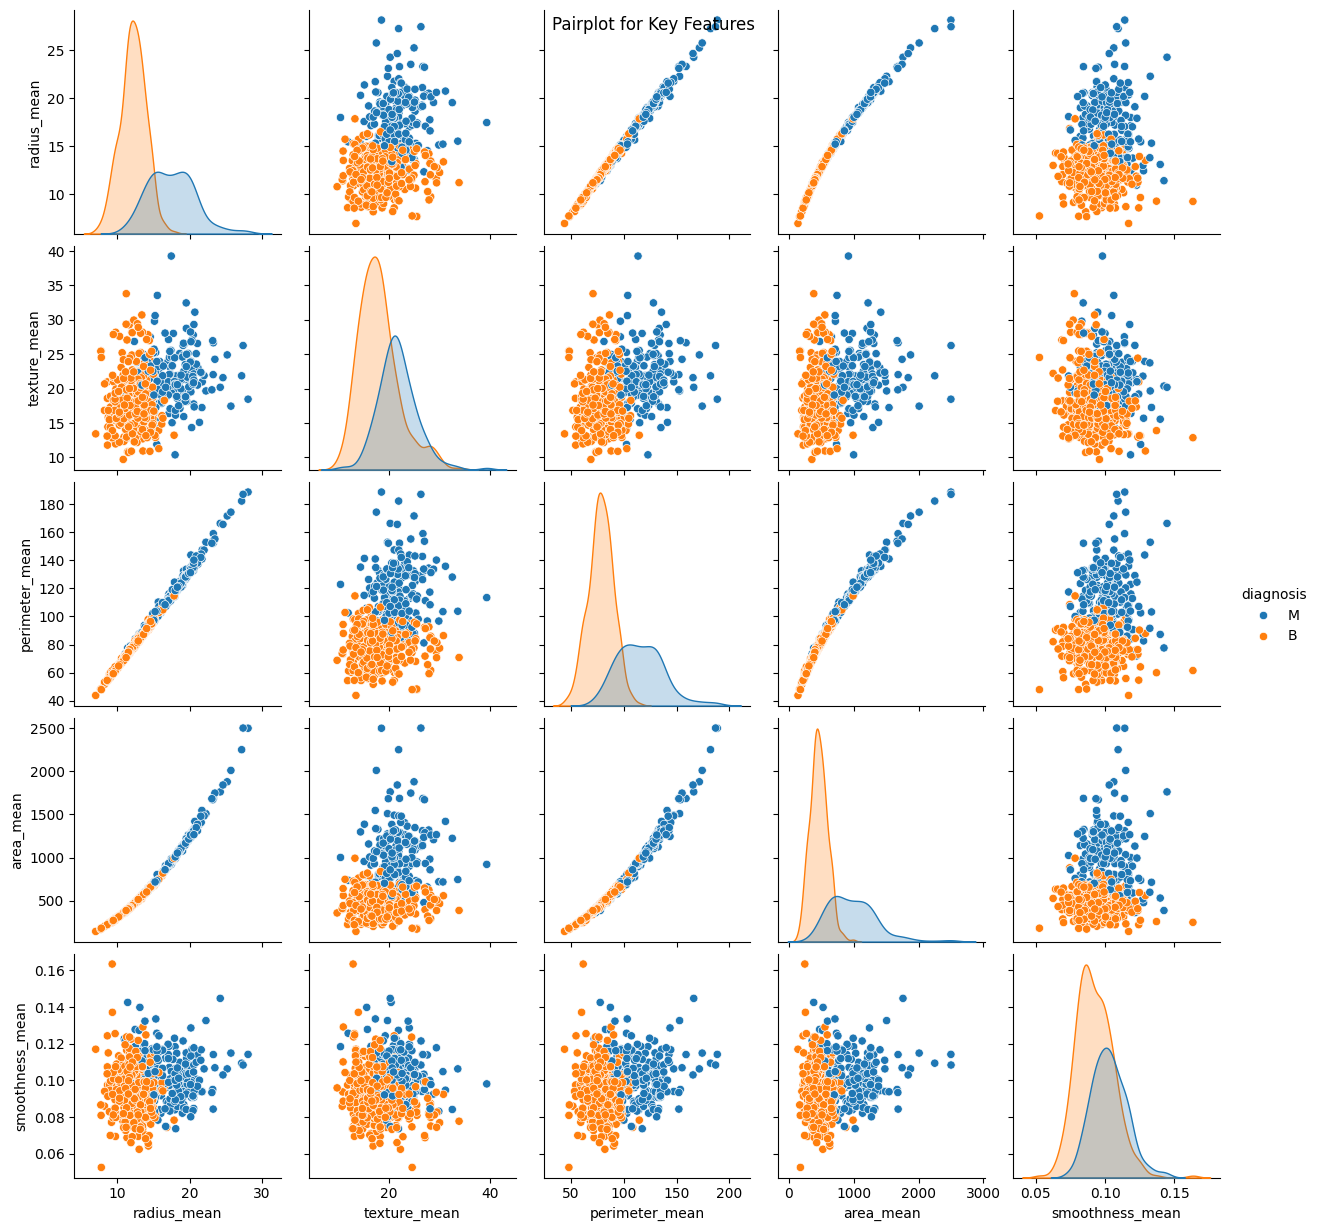

In [32]:
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df, hue='diagnosis', vars=key_features)
plt.suptitle("Pairplot for Key Features")
plt.show()

<ipython-input-35-2073f2c58fa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'diagnosis',y = 'compactness_mean',data=df,palette={'M':'red','B':'green'})


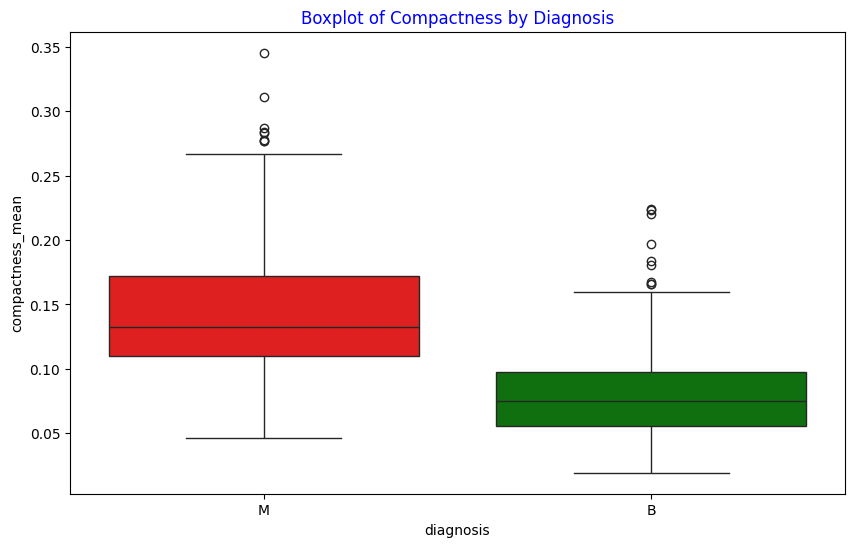

In [35]:
plt.figure(figsize  = (10,6))
sns.boxplot(x = 'diagnosis',y = 'compactness_mean',data=df,palette={'M':'red','B':'green'})
plt.title("Boxplot of Compactness by Diagnosis",c = 'b')
plt.show()

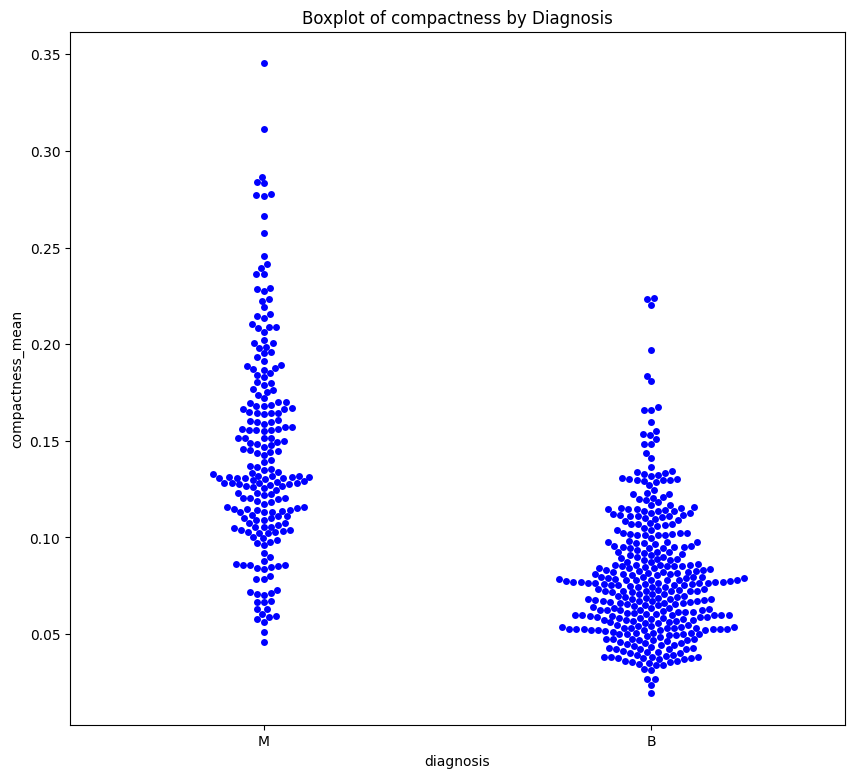

In [36]:
plt.figure(figsize = (10,9))
sns.swarmplot(x = 'diagnosis',y='compactness_mean',data=df,c= 'b')
plt.title("Boxplot of compactness by Diagnosis")
plt.show()

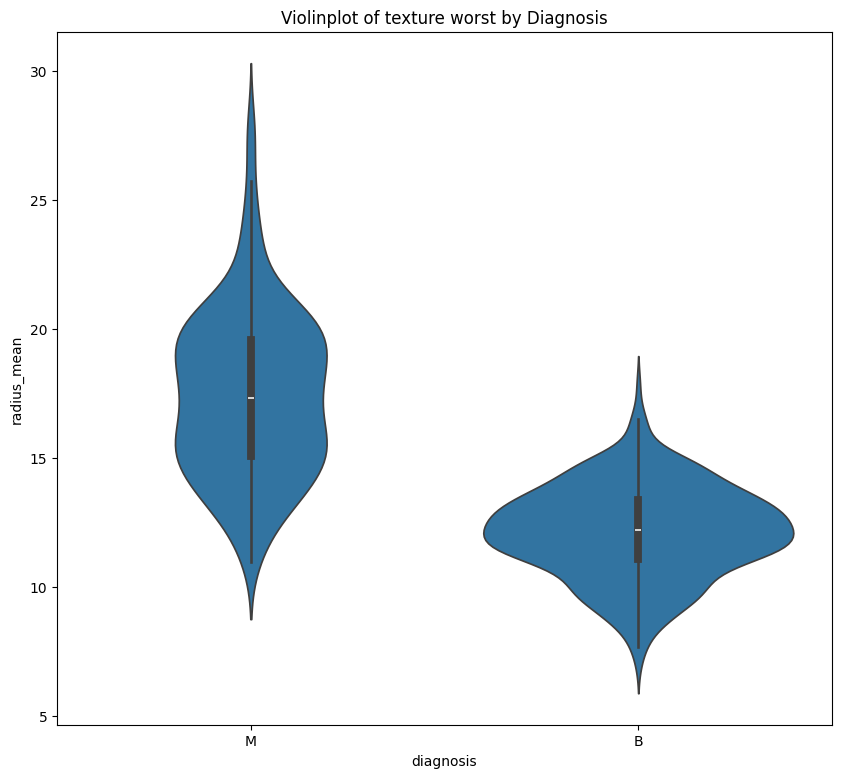

In [38]:
plt.figure(figsize = (10,9))
sns.violinplot(x = 'diagnosis',y= 'radius_mean',data=df)
plt.title("Violinplot of texture worst by Diagnosis")
plt.show()

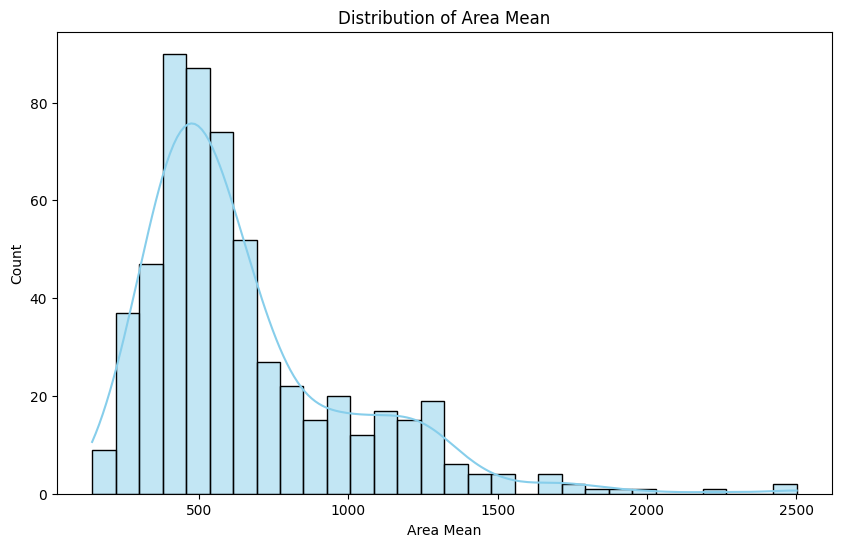

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area_mean'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Area Mean")
plt.xlabel("Area Mean")
plt.show()

<ipython-input-40-f7be20ff1be7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diagnosis', y='smoothness_mean', data=df, ci=None, palette={'M': 'pink', 'B': 'blue'})
<ipython-input-40-f7be20ff1be7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diagnosis', y='smoothness_mean', data=df, ci=None, palette={'M': 'pink', 'B': 'blue'})


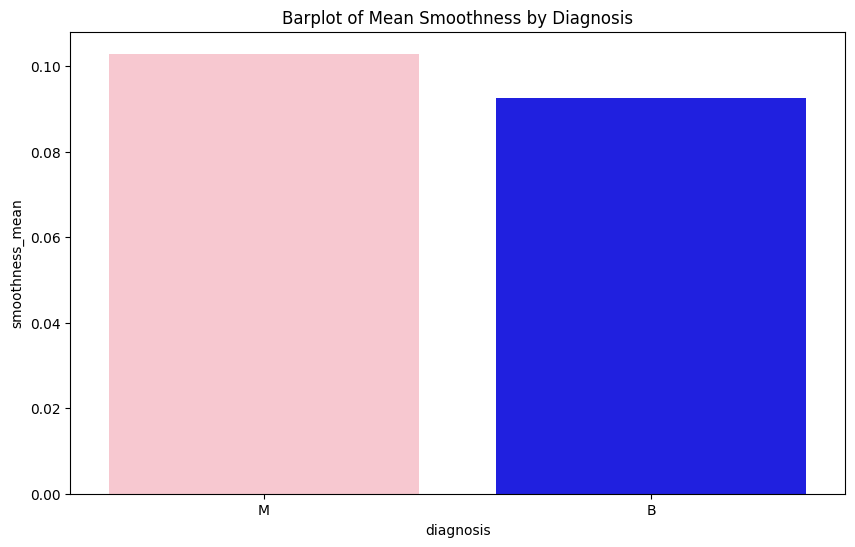

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis', y='smoothness_mean', data=df, ci=None, palette={'M': 'pink', 'B': 'blue'})
plt.title("Barplot of Mean Smoothness by Diagnosis")
plt.show()

In [42]:
import plotly.express as px

# Select three features for 3D scatter plot
feature_x = 'radius_mean'
feature_y = 'texture_mean'
feature_z = 'area_mean'

# Create 3D scatter plot using Plotly Express
fig_3d_scatter = px.scatter_3d(df, x=feature_x, y=feature_y, z=feature_z, color='diagnosis',
                               size='smoothness_mean', title="3D Scatter Plot")

# Show the 3D scatter plot
fig_3d_scatter.show()

In [43]:
import plotly.express as px

# Select three features for 3D scatter plot
feature_x = 'radius_worst'
feature_y = 'texture_worst'
feature_z = 'area_worst'

# Create 3D scatter plot using Plotly Express
fig_3d_scatter = px.scatter_3d(df, x=feature_x, y=feature_y, z=feature_z, color='diagnosis',
                               size='smoothness_mean', title="3D Scatter Plot")

# Show the 3D scatter plot
fig_3d_scatter.show()

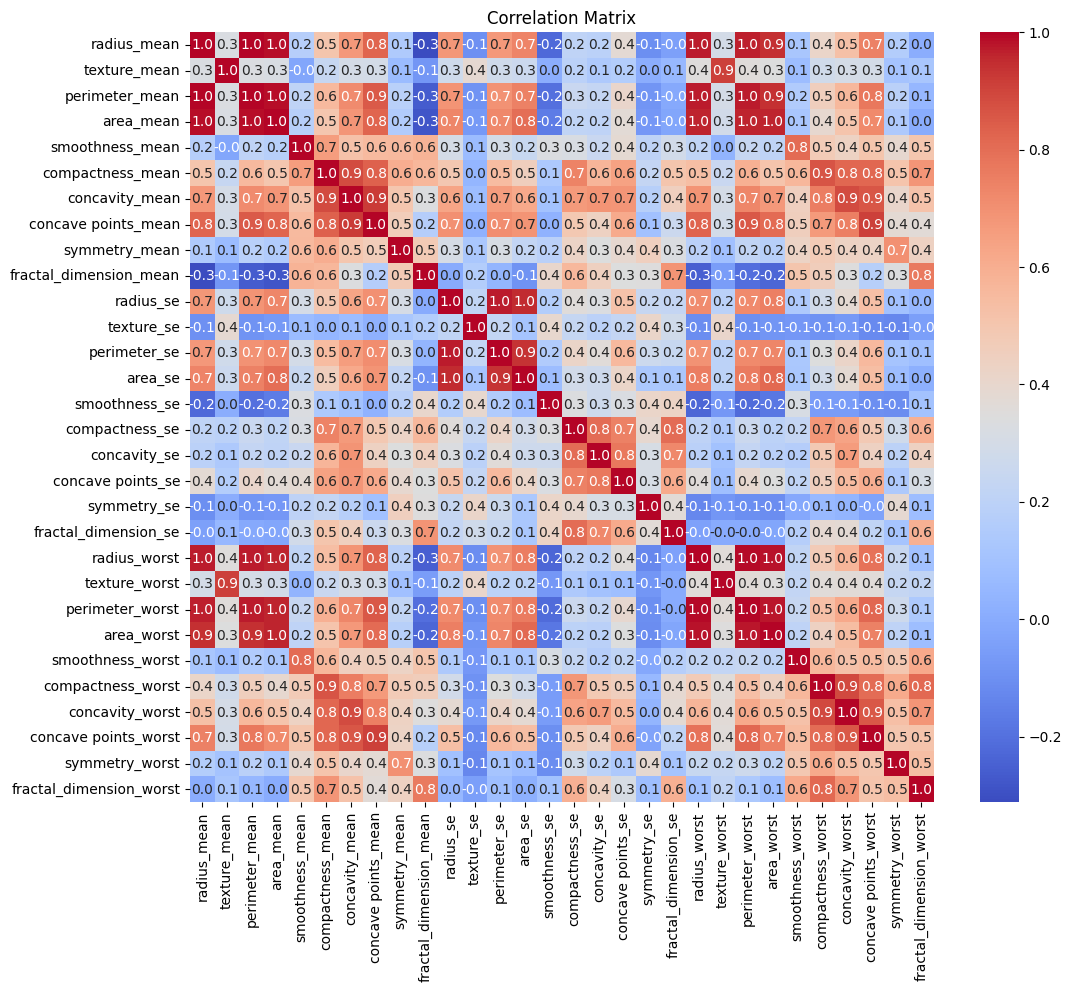

In [44]:
corr_matrix = df.iloc[:,2:].corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt = ".1f")
plt.title("Correlation Matrix")
plt.show()

In [46]:
X = df.iloc[:,2:]
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x)

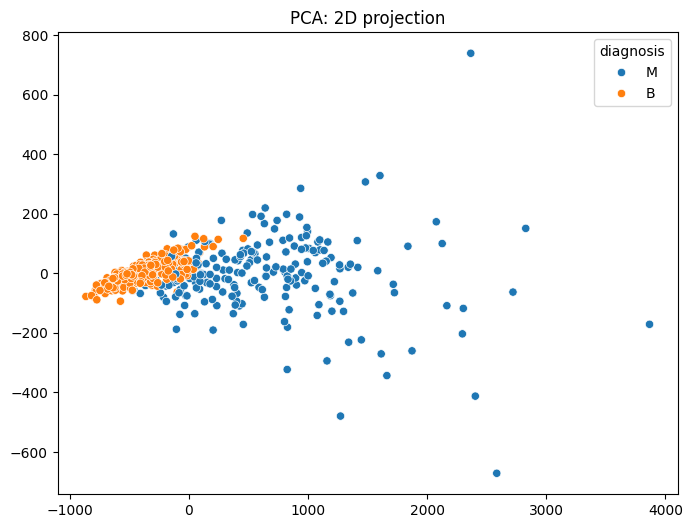

In [49]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = X_pca[:,0],y = X_pca[:,1],hue = df['diagnosis'])
plt.title("PCA: 2D projection")
plt.show()

#**Train Test Split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(455, 30)
(114, 30)
(455,)
(455,)


In [51]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



The Accuracy_score of y_pred is 0.96. As we can see the classification report of Malignant and Benign diagnosis is accurary is 0.96 with macro and weighted avg.

**Prognosis and Survival:**
Prognosis depends on factors like the stage at diagnosis, tumor characteristics, and the effectiveness of treatment. Early detection through regular screening significantly improves survival rates.

**Prevention:**
**Screening:** Regular mammograms and clinical breast exams for early detection.
**Healthy Lifestyle:** Maintaining a healthy weight, regular exercise, limiting alcohol consumption, and avoiding smoking.

Breast cancer awareness and research have led to improved treatments and outcomes, emphasizing the importance of early detection and multidisciplinary approaches to care. Ongoing efforts in research and education continue to shape the landscape of breast cancer prevention and treatment.

